# Exploring the Weather in Athens

The scope of this project is to explore the weather in Athens over a period of more than 50 years.

---

> Ioannis Dekoulakos <br />
> Athens University of Economics and Business <br />
> Business Analytics Practicum I - PT <br />
> A.M.: P2822110


## Questions

### Q1: Obtain the Data

We will work with data covering the period from 1955 to 2020. The data will be obtained from two sources:
- Data downloaded from the National Oceanic and Atmospheric Administration's National Centers for Environmental Information (https://www.ncdc.noaa.gov/cdo-web/) and in particular https://www.ncdc.noaa.gov/cdo-web/search.
- To fill in any missing data we will use an alternative dataset available from https://data.hellenicdataservice.gr/dataset/66e1c19a-7b0e-456f-b465-b301a1130e3f; this dataset covers only the period from 2010-2019.

We will only download the data from the Hellinikon weather station.


We will concentrate on the average daily temperature and precipitation so it is not necessary to download any other information for above sites.

- Average Temperature (TAVG)
- Maximum temperature (TMAX)
- Minimum temperature (TMIN)
- Precipitation (PRCP)

Units were set to : Metric (Celsius and millimeters as well ) 




To begin with, we will import all the necessary packages :

In [3]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
import datetime
import seaborn as sns

- Next, we will generate a data frame ,using tha data from Hellinikon , wich contain the period from 1955 to 2020

In [109]:
df1=pd.read_csv("hellinikon.csv" , parse_dates=['DATE'])

#### Paramentres 


- Station: Station's ID
- PRCP : Precipitation (mm)
- TAVG : Average Temperature (Celsius)
- TMAX : Maximum Temperature (Celsius)
- TMIN : Minimum Temperature (Celsius)

#### DESCRIPTIVE ANALYSIS AND EXPLORATORY DATA

In [7]:
df1['DATE'].value_counts()

1955-01-01    1
1997-06-17    1
1997-06-15    1
1997-06-14    1
1997-06-13    1
             ..
1976-03-19    1
1976-03-18    1
1976-03-17    1
1976-03-16    1
2020-12-31    1
Name: DATE, Length: 23251, dtype: int64

- We can see that the max/min/avg values of each column are correct , as they are typical tempetures of a Greek year in Athens.

In [ ]:
df1.describe()

- Data types are correct as well 

In [ ]:
df1.dtypes

In [10]:
# the column "station" is not nesecarry 
del df1['STATION']

#### Missing values 
- We will check about the missing values , using some plots 

<AxesSubplot:>

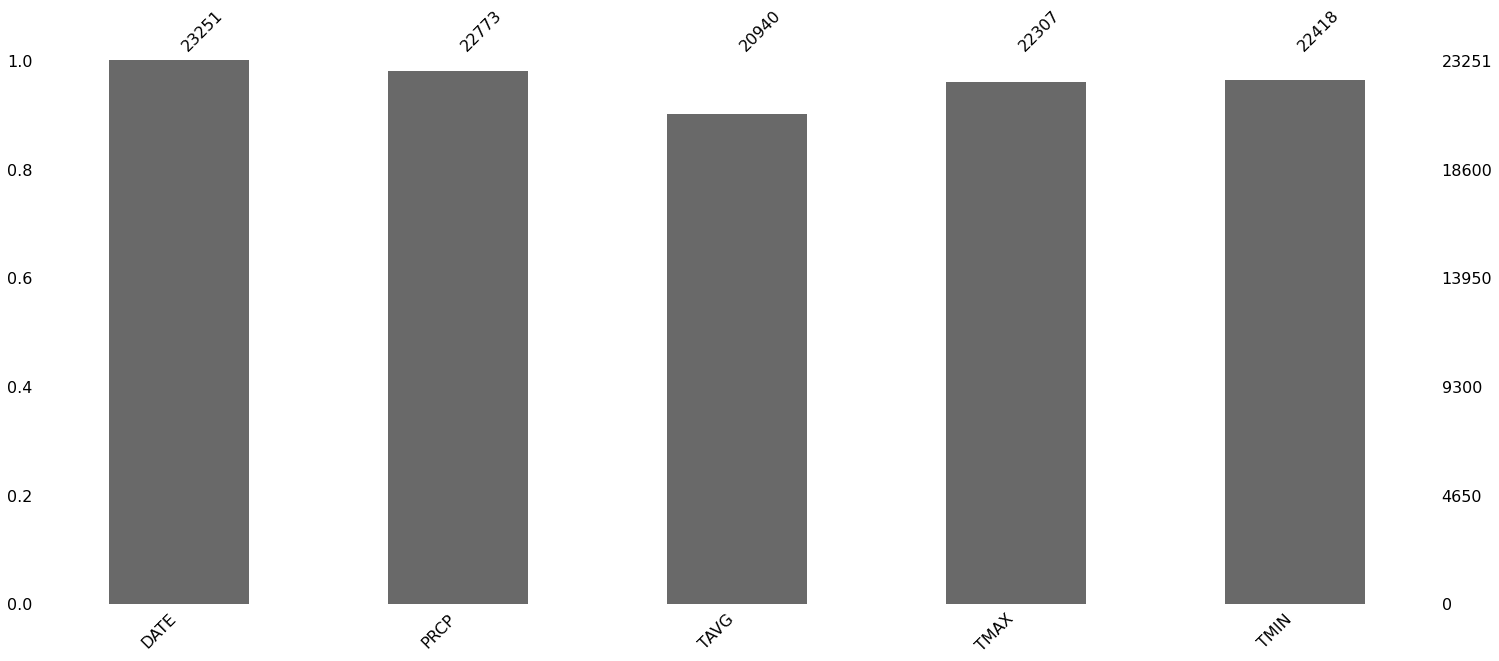

In [11]:
import missingno as msn

msn.bar(df1)

It seems that there are many missing data about the Average Temperature and less about the Precipitation. Also there a lot of missing dates. 

So, for more exploration we will split the dataframe into two dataframes:
- after 2010
- before 2010

We know that we have data after 2010 until 2019  available ,we will use them to fill the missing data to the main data set. 

In [12]:
#split into 2 data set , before 2010 

df2=df1[df1['DATE'] < "2010-01-01"]

#after 2010 

df3 = df1[df1['DATE'] >= "2010-01-01"]


<AxesSubplot:>

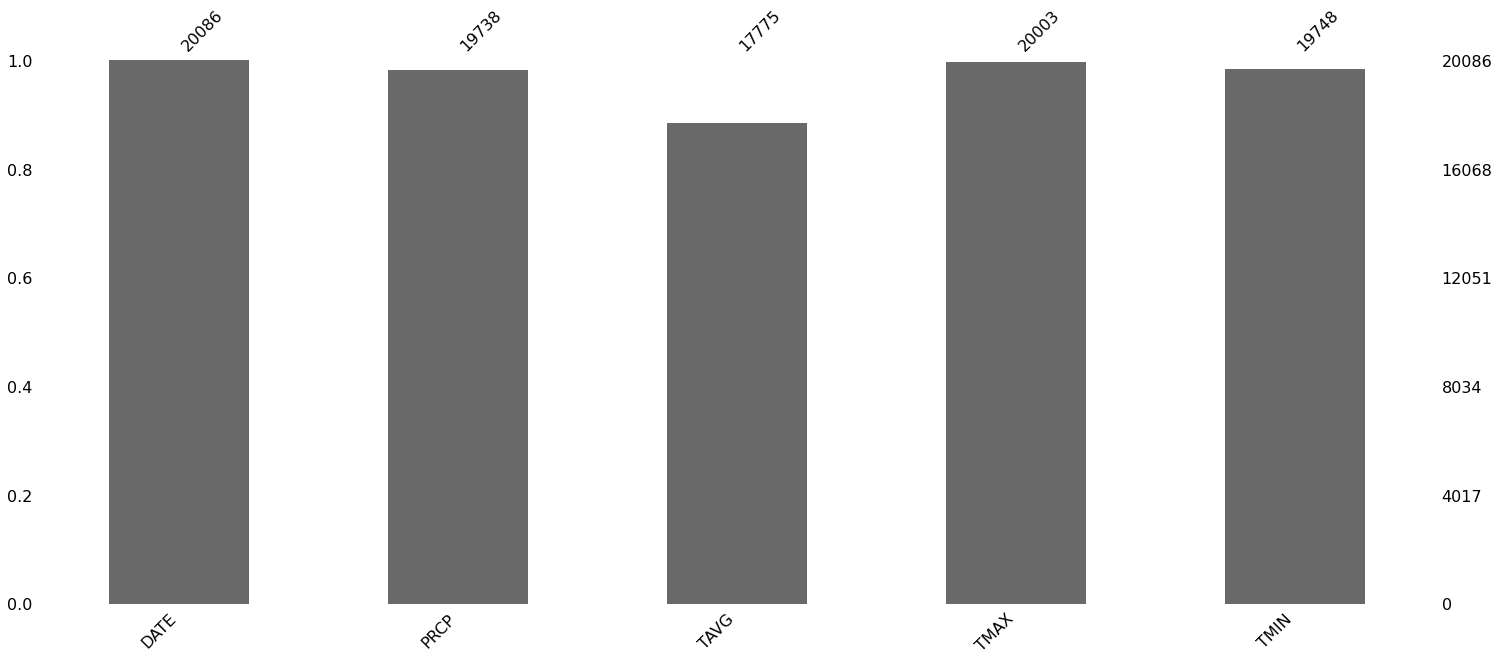

In [13]:
#before 2010
msn.bar(df2)

- We need to mention that our analysis is based only on the average tempeture , so it is a good idea to fill this column using the avarage of min/max tempeture. For this purpose, the following correlation matrix has been created.

<AxesSubplot:>

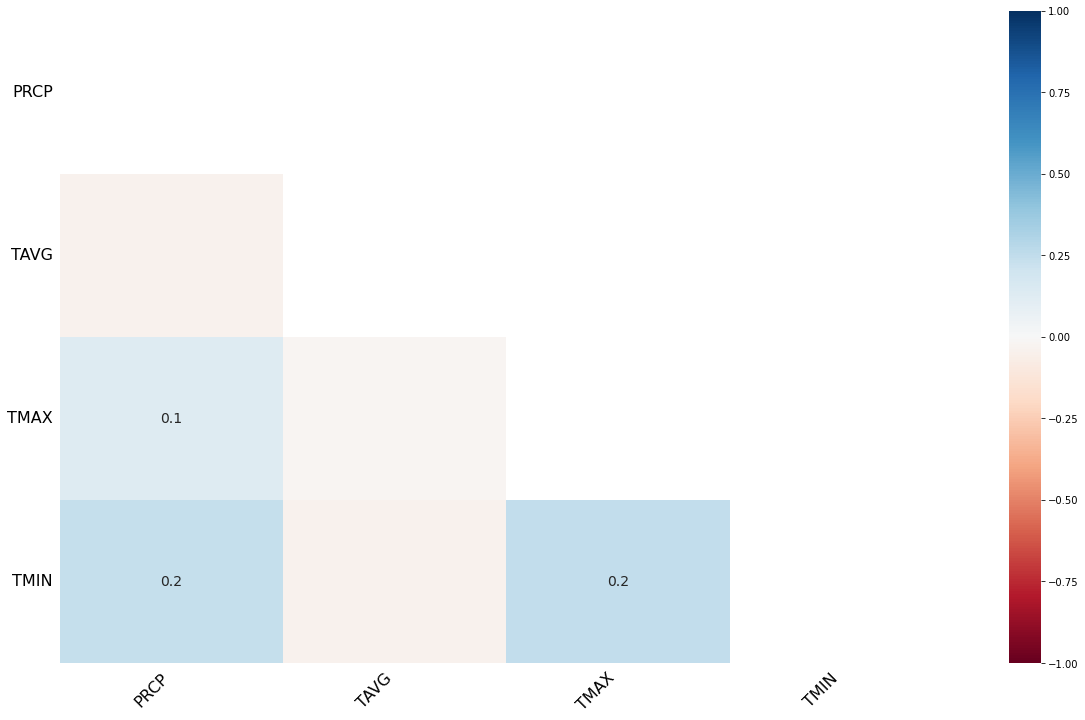

In [14]:
msn.heatmap(df2)

- It seems that there is not any  corellation ,regarding the missing data, between the tvag and tmax-tmin is almost 0. This means that these columns have NOT (almost) missing values in the same rows , so we can calculated the average of tmax and tmin for the dates which we have not the average tempeture. 


##### Alternative dataset for 2010-2019

- the alternative dataset is  available from https://data.hellenicdataservice.gr/dataset/66e1c19a-7b0e-456f-b465-b301a1130e3f; this dataset covers only the period from 2010-2019.

- it has '---' as a missing value and we must carefully , Also we set the column 0 to data type 'dates' 

In [110]:
athens_extra=pd.read_csv("athens.csv" , header=None,
                          na_values=['---'],
                          parse_dates=[0])

In [18]:
athens_extra.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2010-01-01,17.9,18.1,17.8,61.4,91,33,1003.6,1006.3,1002.0,0.2,4.0,WSW,12.7
1,2010-01-02,15.6,15.7,15.5,57.4,70,45,1005.2,1008.7,1001.5,0.0,6.8,WSW,20.7
2,2010-01-03,13.5,13.6,13.4,56.0,76,39,1011.7,1016.7,1008.6,0.0,5.0,WSW,15.4
3,2010-01-04,9.5,9.6,9.5,50.7,60,38,1021.3,1023.1,1016.8,0.0,4.3,NNE,11.0
4,2010-01-05,13.4,13.5,13.4,70.5,82,54,1018.7,1022.1,1015.5,0.0,7.9,S,19.8


- It seems that the minimum and maximum temperatures differ by only about 2 units, it is not make sense but 

We will keep only the useful columns 0 , 1 , 2 
- Date
- temp 
- Precipitation

In [20]:
athens_extra=athens_extra[[0,1,10]]
athens_extra.columns=['DATE','temp_Ath','prcp_Ath']
athens_extra

,DATE,temp_Ath,prcp_Ath
0,2010-01-01,17.9,0.2
1,2010-01-02,15.6,0.0
2,2010-01-03,13.5,0.0
3,2010-01-04,9.5,0.0
4,2010-01-05,13.4,0.0
...,...,...,...
3647,2019-12-27,10.1,0.0
3648,2019-12-28,8.3,7.2
3649,2019-12-29,6.4,3.4
3650,2019-12-30,4.0,12.4


In [21]:
athens_extra.dtypes

DATE        datetime64[ns]
temp_Ath           float64
prcp_Ath           float64
dtype: object

- there is not any NaN

In [23]:
athens_extra['prcp_Ath'].isna().sum()

0

- We are ready to merge the dataframes into one dataframe 

In [24]:
main= pd.merge (df1 , athens_extra , how='outer', on='DATE', suffixes=('_hellinikon', '_athens'))
main = main.sort_values(by=['DATE'])

In [25]:
main

,DATE,PRCP,TAVG,TMAX,TMIN,temp_Ath,prcp_Ath
0,1955-01-01,0.0,NaN,18.5,10.2,NaN,NaN
1,1955-01-02,2.0,NaN,14.4,7.0,NaN,NaN
2,1955-01-03,0.0,NaN,15.8,9.6,NaN,NaN
3,1955-01-04,0.0,NaN,18.8,7.3,NaN,NaN
4,1955-01-05,0.0,NaN,17.9,8.4,NaN,NaN
...,...,...,...,...,...,...,...
23246,2020-12-27,0.0,16.6,NaN,NaN,NaN,NaN
23247,2020-12-28,6.6,14.8,18.2,11.9,NaN,NaN
23248,2020-12-29,0.0,16.3,19.9,12.5,NaN,NaN
23249,2020-12-30,0.0,16.4,19.9,14.8,NaN,NaN


- Now, we have only 3 missing dates 

In [27]:
main_ind= main.set_index('DATE')
idx1= pd.date_range (start ='1955-01-01' , end= '2020-12-31').difference(main_ind.index)
idx1

DatetimeIndex(['2006-01-31', '2006-02-03', '2007-08-28'], dtype='datetime64[ns]', freq=None)

- Let's fill the missing prcp & tavg data with prcp_Ath & temp_ath as well

In [28]:
main['PRCP']=np.where(main['PRCP'].isna(),main['prcp_Ath'] , main['PRCP'] )

In [29]:
main['TAVG']=np.where(main['TAVG'].isna(),main['temp_Ath'] , main['TAVG'] )

- Now , let's check for NaN in the columns we are interested in

<AxesSubplot:>

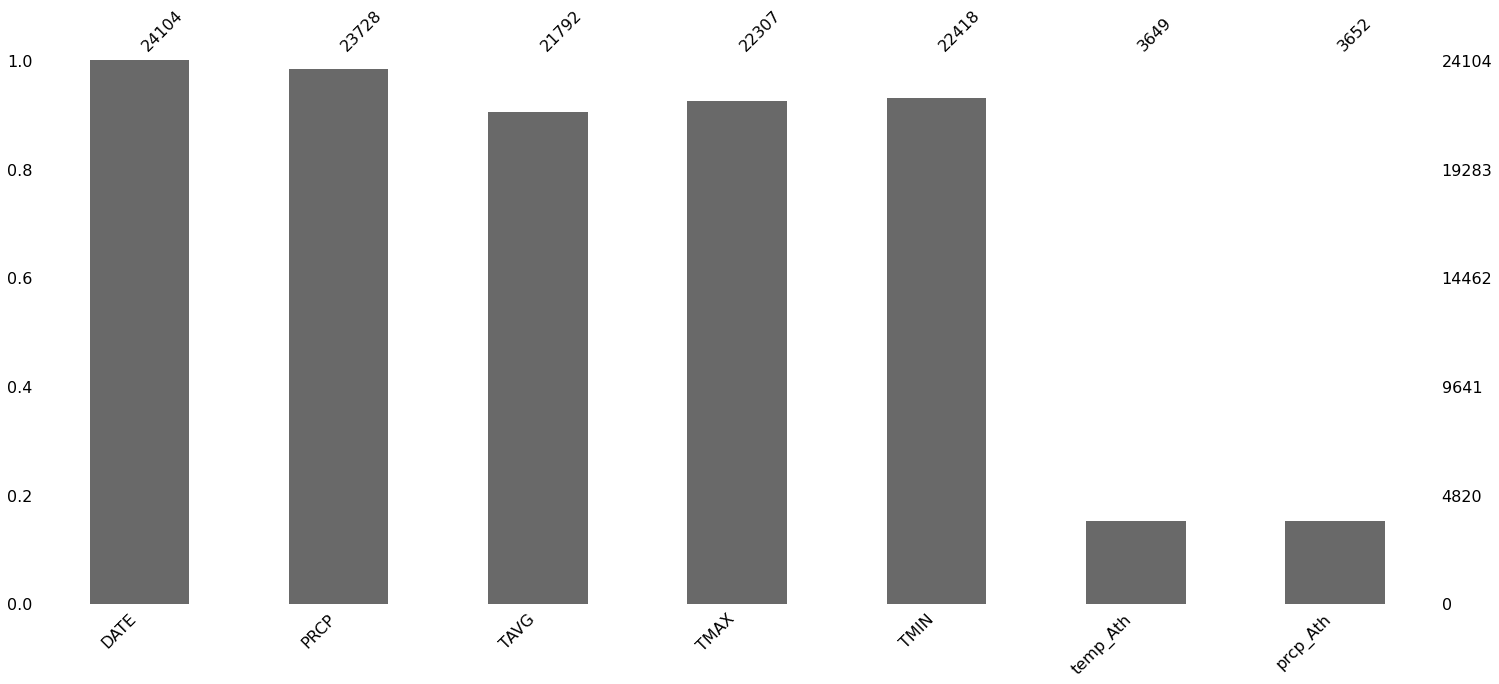

In [30]:
msn.bar(main)

- Then, we fill the dates before and after the period 2010-2019 with average of tmax & tmin as we said

For this reason, we will replace the NaN with the numeric values (not possible values) and then we replace these not possible values with the average.

In [32]:
main['TMIN'].min()

-4.2

In [33]:
main['TMAX'].min()

1.0

In [34]:
main['TMIN']=main['TMIN'].fillna(-5)
main['TMAX']=main['TMAX'].fillna(-1)

In [35]:
main['avrg_calculated'] = np.where( (main['TMIN']>-5) & (main['TMAX']>-1), main[["TMIN","TMAX"]].mean(axis=1), np.nan) 

In [36]:
main['TAVG']=np.where(main['TAVG'].isna(),main['avrg_calculated'] , main['TAVG'] )

In [37]:
# delete all the columns which not offer any value 

del main['TMAX']
del main['TMIN']
del main['avrg_calculated']
del main['prcp_Ath']
del main['temp_Ath']


In [38]:
main.head()

,DATE,PRCP,TAVG
0,1955-01-01,0.0,14.35
1,1955-01-02,2.0,10.70
2,1955-01-03,0.0,12.70
3,1955-01-04,0.0,13.05
4,1955-01-05,0.0,13.15


Improvement is evident ,We have only 
- 376 NaN for PRCP
- 2 NaN for TAVG

<AxesSubplot:>

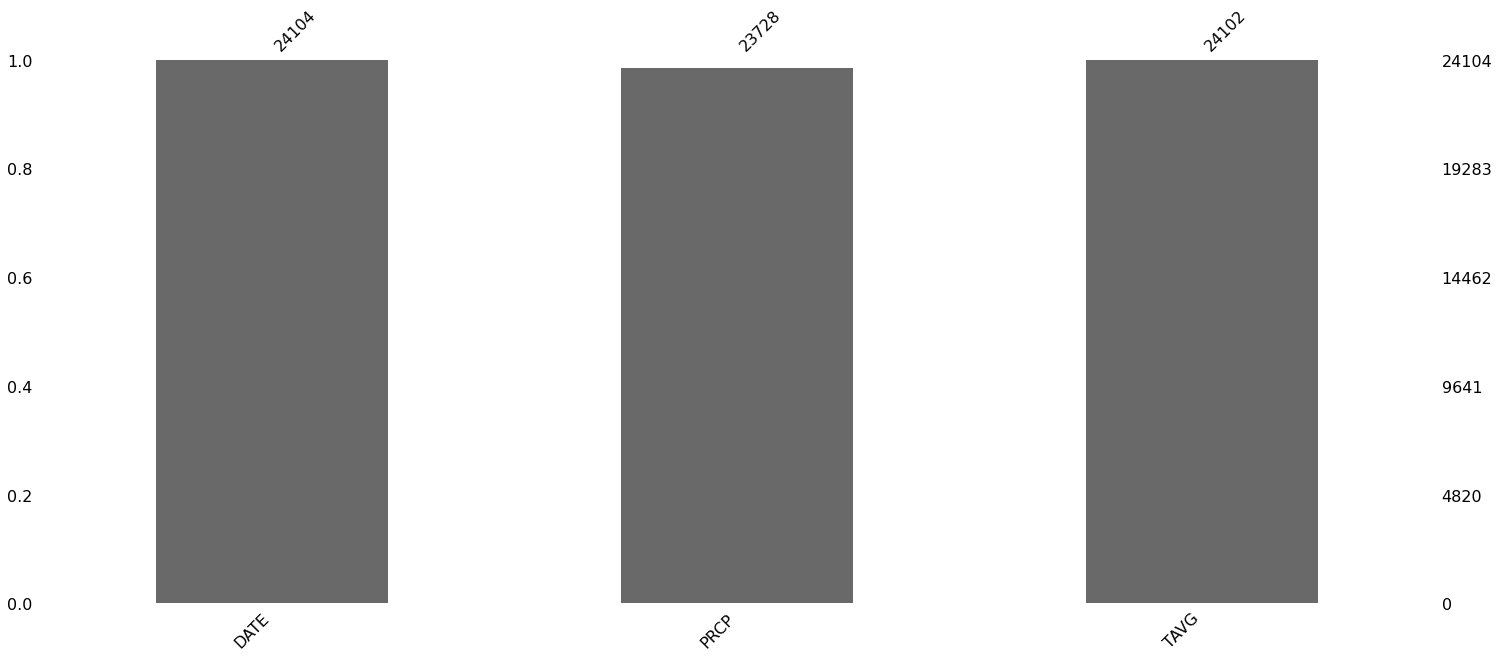

In [40]:
msn.bar(main)

- Final, we will make a copy data frame which we will use for the following questins. Also, in this frame we will create a column with the year, it will be very useful.

In [44]:
final= main.copy()


In [45]:
final["year"] = final["DATE"].dt.year
# cretate a column with year 

### Q2: Deviation of Summer Temperatures

The Hellenic National Meteorological Service has published a [report](http://www.emy.gr/emy/en/pdf/2020_GRsignificantEVENT_en.pdf) on extreme weather events for 2020.

- We will create a plot like the plot in page 7 of The Hellenic National Meteorological Service showing the mean summer temperature deviation from a baseline of 1974-1999. 

We use the data about the summer dates only

In [46]:
summer_dates = final.loc[((final['DATE'].dt.month == 6) | (final['DATE'].dt.month == 7) | 
                (final['DATE'].dt.month == 8)), ['DATE', 'year','TAVG']]

# take only the summers dates 

- calculation of baseline

In [47]:
baseline_temp = summer_dates.loc[summer_dates["year"].isin(range(1974, 2000)), "TAVG"].mean()
# calculate the avg temp only for the range 1974, 2000

In [48]:
baseline_temp

26.230727424749166

- calculate and groub by the average temperature of each summer , by the year for all years

In [49]:
summer_grouped = summer_dates.groupby('year')['TAVG'].agg(['mean'])
#  group by the year 

In [50]:
summer_grouped.head()

,mean
year,
1955,25.951087
1956,27.143478
1957,27.371739
1958,27.081522
1959,26.401087


- calculate and create a new column with the distance of avg temp from the baseline

In [51]:
summer_grouped['deviation'] = summer_grouped['mean']-baseline_temp
# calculate and create a new column with deviation from baseline

In [52]:
summer_grouped.head()

,mean,deviation
year,,
1955,25.951087,-0.279640
1956,27.143478,0.912751
1957,27.371739,1.141012
1958,27.081522,0.850794
1959,26.401087,0.170360


 - create a column with 10-rolling of the deviation from the mean.

In [54]:
summer_grouped['roll_avg']  = summer_grouped['deviation'].rolling(window=10 , min_periods=1).mean()

**Plot**

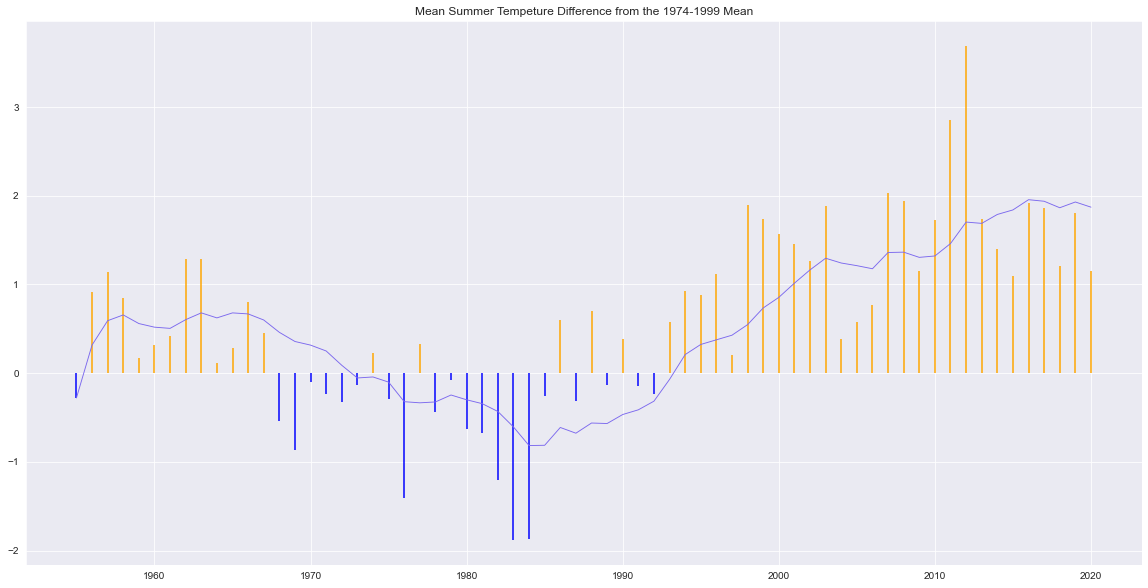

In [56]:
# the documention of the plot could be found at 
# https://python-graph-gallery.com/185-lollipop-plot-with-conditional-color?fbclid=IwAR37g2BTpCW3HRlUAy7ZmnmsuyJl2JRNmcO_jEAq4M_AKMe9dymIYLHtQhE


sns.set({'figure.figsize':(20,10)})
# Data

x = summer_grouped.index
y = summer_grouped['deviation']
l= summer_grouped['roll_avg'] 
 
    
# Create a color if the y axis value is equal or greater than 0
color1= np.where(y>=0, 'orange', 'blue')
plt.vlines(x=x, ymin=0, ymax=y, color=color1, alpha=1)

plt.plot(l ,color ='mediumslateblue', linewidth=0.9)

# Add title and axis names

plt.title("Mean Summer Tempeture Difference from the 1974-1999 Mean" )

# Show
        
plt.show()

#### Intepretation of the figure

First of all, as we see from the line which is the 10 years rolling average of the deviation from the mean, it is clearly that there is an increase in the average summer temperature in the last 20 years, specifally the period around 2010.Something which confirm with [research](https://ourworldindata.org/grapher/co-emissions-per-capita?tab=chart&time=earliest..2020&country=~GRC) about the capita CO₂ emissions
Carbon dioxide (CO₂) emissions from the burning of fossil fuels for energy and cement production. The highest deviation from the mean till today has been recorded in 2012.

The trend follows an increasing pattern and confirm the [predictions](https://el.wikipedia.org/wiki/%CE%9A%CE%BB%CE%B9%CE%BC%CE%B1%CF%84%CE%B9%CE%BA%CE%AE_%CE%B1%CE%BB%CE%BB%CE%B1%CE%B3%CE%AE_%CF%83%CF%84%CE%B7%CE%BD_%CE%95%CE%BB%CE%BB%CE%AC%CE%B4%CE%B1) about the climate change in Greece.


Final , we can see that in the period 1955-1995 the mean of summer temperature fluctuated at low levels.



###  Q3: Evolution of Daily Temperatures


- We will create a plot showing the daily temperature for each year. The line corresponding to each year will be smoothed by using a 30 days rolling average. 

- First,we will crete a dataframe from this section and we will add a column with number of dayweek & a column with average temp  each day of the year as well.

In [59]:
data_for_q3=final.copy()

In [60]:
data_for_q3["day_of_year"] = final["DATE"].dt.dayofyear
#create a column with the number of dayweek

- Then , we will calculate the 30 days rolling average

In [61]:
data_for_q3["roll_q3"] = data_for_q3["TAVG"].rolling(30, min_periods=1).mean()
#create a column with 30-rolling mean of temp

In [62]:
data_for_q3.head()

,DATE,PRCP,TAVG,year,day_of_year,roll_q3
0,1955-01-01,0.0,14.35,1955,1,14.350000
1,1955-01-02,2.0,10.70,1955,2,12.525000
2,1955-01-03,0.0,12.70,1955,3,12.583333
3,1955-01-04,0.0,13.05,1955,4,12.700000
4,1955-01-05,0.0,13.15,1955,5,12.790000


- We will take the data for calculation of the average daily temperature for the baseline period of 1974-1999

- Also , we will create 30-rolling mean of base line temp for each day of week

In [63]:
baseline_data=data_for_q3.loc[data_for_q3["year"].isin(range(1974, 2000))] 
#take the date from baseline 1974-1999 only

In [64]:
avg_temp_baseline =baseline_data.groupby(by=[baseline_data['day_of_year']]).mean()
#groub by the data according day of week 


In [65]:
avg_temp_baseline['roll_baseline'] =avg_temp_baseline ['TAVG'].rolling(window=30,min_periods=1).mean()
#create a column with 30-rolling mean of base line temp for each day of week

In [66]:
del avg_temp_baseline['PRCP'] #not value 

In [67]:
del avg_temp_baseline['year']# not value 

In [68]:
del avg_temp_baseline['roll_q3']# not value

In [69]:
avg_temp_baseline

,TAVG,roll_baseline
day_of_year,,
1,10.365385,10.365385
2,10.707692,10.536538
3,10.207692,10.426923
4,9.634615,10.228846
5,9.919231,10.166923
...,...,...
362,10.261538,11.560385
363,10.653846,11.481923
364,11.011538,11.433590


**Plot**

- The lines are colored from light orange to dark orange, progressing through the years in ascending order.
- The black line is the average daily temperature for the baseline period of 1974-1999.

In [71]:
from calendar import monthrange

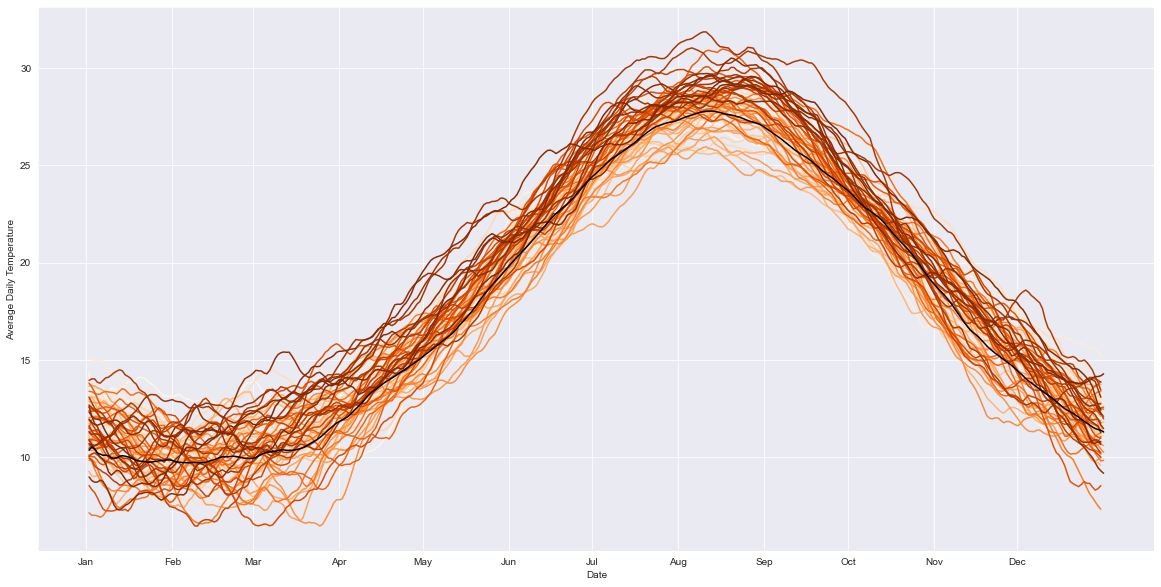

In [72]:
sns.set({'figure.figsize':(20,10)})

col = plt.get_cmap('Oranges')


g=sns.lineplot(data=data_for_q3, 
             x='day_of_year', 
             y='roll_q3', 
             hue='year', 
             legend='full', palette= ([col(i) for i in np.linspace(0, 1, 66)]))

#66 numbers of years

# make the ticks
t = [0]
for month in range(1,13):
  t.append(monthrange(2020, month)[1])

t = np.cumsum(t)[:-1]
    
    
names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#make the baseline 
sns.lineplot(data=avg_temp_baseline, 
             x=avg_temp_baseline.index, 
             y='roll_baseline', 
             legend='full',color='black')

#
g.set_xticks(t)
g.set_xticklabels(names)

g.set(xlabel="Date", ylabel = "Average Daily Temperature")
# move the legend out
plt.legend([],[], frameon=False);



#### Intepretation of the figure
- First, we can see compared to the black line that the temperatures have risen in recent years for all months. The dark orange lines are higher than the light orange and the black line (the Average daily Temperature for dates between 1974 and 1999). 

- Athens has almost mild winters with average temperature 10°C , warm summers with average temperature 22-28°C , the autumn has an average temperature 18-24°C and spring an average temperature 10-20°C . These temperatures are in line with the Mediterranean climate that prevails in our country 

- But as we mentioned the last years all of these tumperatures have increased significantly. 




### Q4: Extreme Temperature Events

Another mesure used by climatologists is the number of extreme events.
- We will deal with extreme heat events going 10% above the baseline.
- We will count the number of extreme temperature events per year, compared to the baseline of 1974-1999.

We need to calculate the:
- percentage of extreme heat events calculated over the number of observations for each year
- the average percentage of extreme tempearture events of the baseline


First , we will make a copy dataframe for this section and add a new column with the day of month

In [74]:
data_for_q4=final.copy()

In [75]:
data_for_q4["month"] = final["DATE"].dt.month

In [76]:
data_for_q4["day_of_month"] = final["DATE"].dt.strftime('%m-%d')
# day_of_of month

In [77]:
data_for_q4

,DATE,PRCP,TAVG,year,month,day_of_month
0,1955-01-01,0.0,14.35,1955,1,01-01
1,1955-01-02,2.0,10.70,1955,1,01-02
2,1955-01-03,0.0,12.70,1955,1,01-03
3,1955-01-04,0.0,13.05,1955,1,01-04
4,1955-01-05,0.0,13.15,1955,1,01-05
...,...,...,...,...,...,...
23246,2020-12-27,0.0,16.60,2020,12,12-27
23247,2020-12-28,6.6,14.80,2020,12,12-28
23248,2020-12-29,0.0,16.30,2020,12,12-29
23249,2020-12-30,0.0,16.40,2020,12,12-30


- Then we will take the data in range 1974-1999 for baseline and we will calculate the avg groub by the day of month

In [78]:
baseline_data_q4=data_for_q4.loc[data_for_q4["year"].isin(range(1974, 2000)), ['day_of_month','TAVG']]
# data in range 1974-2000

In [79]:
baseline_avg_q4 =baseline_data_q4.groupby(by=[baseline_data_q4['day_of_month']]).mean()
#groub by day of month and mean

In [80]:
baseline_avg_q4

,TAVG
day_of_month,
01-01,10.365385
01-02,10.707692
01-03,10.207692
01-04,9.634615
01-05,9.919231
...,...
12-27,9.769231
12-28,10.207692
12-29,10.776923


- Now , we will merge the dataframe with the data for q4 with the baseline dataframe 

In [81]:
full_q4 = data_for_q4.merge(baseline_avg_q4, how='left', on='day_of_month', suffixes=('', '_per_day'))
#merged 

In [82]:
full_q4 

,DATE,PRCP,TAVG,year,month,day_of_month,TAVG_per_day
0,1955-01-01,0.0,14.35,1955,1,01-01,10.365385
1,1955-01-02,2.0,10.70,1955,1,01-02,10.707692
2,1955-01-03,0.0,12.70,1955,1,01-03,10.207692
3,1955-01-04,0.0,13.05,1955,1,01-04,9.634615
4,1955-01-05,0.0,13.15,1955,1,01-05,9.919231
...,...,...,...,...,...,...,...
24099,2020-12-27,0.0,16.60,2020,12,12-27,9.769231
24100,2020-12-28,6.6,14.80,2020,12,12-28,10.207692
24101,2020-12-29,0.0,16.30,2020,12,12-29,10.776923
24102,2020-12-30,0.0,16.40,2020,12,12-30,11.353846


- extreme heat events going 10% above the baseline.

In [83]:
z=lambda x : x + 0.1 * abs(x)
#function for comparison 

- comparison and create a column with true or false if the value is extreme

In [84]:
full_q4 ['EXTREME'] = (full_q4 ['TAVG'] >= z(full_q4 ['TAVG_per_day']))

In [85]:
full_q4

,DATE,PRCP,TAVG,year,month,day_of_month,TAVG_per_day,EXTREME
0,1955-01-01,0.0,14.35,1955,1,01-01,10.365385,True
1,1955-01-02,2.0,10.70,1955,1,01-02,10.707692,False
2,1955-01-03,0.0,12.70,1955,1,01-03,10.207692,True
3,1955-01-04,0.0,13.05,1955,1,01-04,9.634615,True
4,1955-01-05,0.0,13.15,1955,1,01-05,9.919231,True
...,...,...,...,...,...,...,...,...
24099,2020-12-27,0.0,16.60,2020,12,12-27,9.769231,True
24100,2020-12-28,6.6,14.80,2020,12,12-28,10.207692,True
24101,2020-12-29,0.0,16.30,2020,12,12-29,10.776923,True
24102,2020-12-30,0.0,16.40,2020,12,12-30,11.353846,True


We will create a new frame 
- grouping by year, 
- calculating the number of extreme events (are 10% above the temperature of the date) per year, 
- calculating the number of observations.

In [87]:
extremes= full_q4.groupby('year')['EXTREME'].agg(['sum'])

In [88]:
extremes['count_obs']= full_q4.groupby('year')['EXTREME'].agg(['count'])
#dhmioyrgia enos frame me sum count 

In [89]:
extremes['perc'] = extremes['sum'] / extremes['count_obs']
# to pososto 

In [90]:
extremes

,sum,count_obs,perc
year,,,
1955,128,365,0.350685
1956,113,366,0.308743
1957,116,365,0.317808
1958,130,365,0.356164
1959,96,365,0.263014
...,...,...,...
2016,159,366,0.434426
2017,170,365,0.465753
2018,173,365,0.473973


In [91]:
baseline_q4 = extremes.loc[extremes.index.isin(range(1974, 2000)), "perc"].mean()


In [92]:
baseline_q4

0.24834654827917796

**Plot**

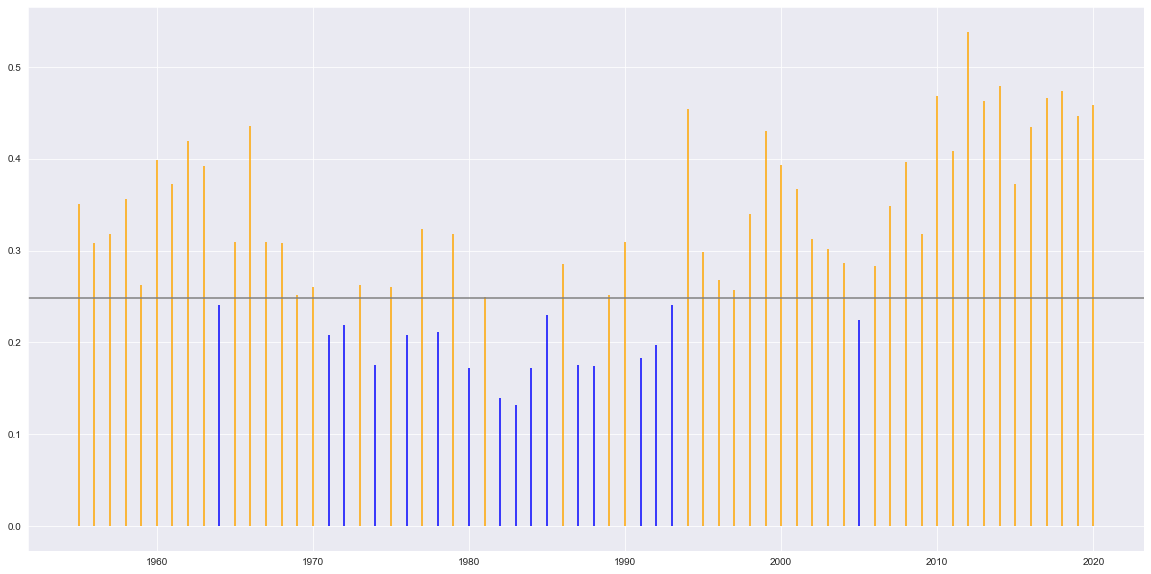

In [94]:
sns.set({'figure.figsize':(20,10)})

# Data

x = extremes.index
y= extremes['perc']
l= baseline_q4
 
# Create a color if the y axis value is equal or greater than 0
color1= np.where(y>=baseline_q4, 'orange', 'blue')
plt.vlines(x=x, ymin=0, ymax=y, color=color1, alpha=1)

plt.axhline(baseline_q4, color="grey")

# Show
        
plt.show()

#### Intepretation of the figure

- From 1955-1970 percentage of extreme heat events was high (expect the year 1964)
- From 1971-1993 percentage of extreme events was relative low
- Final the last 16 years the percentage has significantly increase due to climate change which we have mentioned in the previous sections . The highest percentage has been recorded in 2012 is 2 times bigger than baseline.




we can cunlude that the extreme events are related to climate change


### Q5: Precipitation

Continuing the thread on extreme events, another consideration is rainfall. The weather may or may not be drying up. We are, however, interested in whether precipication becomes more intense over time.

To see that, we will count the overall rainfall over the year and the number of rainy days in each year. Then, by dividing the rainfall by the number of rainy days we will get an indication of whether we are getting rain in more concentrated bursts. We will then create a plot showing the ratio of rainfall over rainy days over the years. On the plot you will overlay the 10 years rolling average. 

First , we will make a copy dataframe for this section.
Then we will make another frame , 
- grouping by the year 
- calculating the overall rainfall
- calculating the number of rainy days

In [97]:
data_q5=final.copy()

In [98]:
prec= data_q5.groupby('year')['PRCP'].agg(['sum'])

In [99]:

data_q5['rain_or_not']=(data_q5['PRCP'] > 0 )


In [100]:
prec['count_rainy_days']= data_q5.groupby('year')['rain_or_not'].agg(['sum'])


In [101]:
prec

,sum,count_rainy_days
year,,
1955,547.0,68
1956,281.3,52
1957,303.2,73
1958,350.0,68
1959,214.0,62
...,...,...
2016,261.6,42
2017,304.3,48
2018,380.2,55


- Also we will calculate and add a column with the ratio sum/the number of rainy days in the year

In [102]:
prec['ratio']=prec["sum"]/prec["count_rainy_days"]

In [103]:
prec.head()

,sum,count_rainy_days,ratio
year,,,
1955,547.0,68,8.044118
1956,281.3,52,5.409615
1957,303.2,73,4.153425
1958,350.0,68,5.147059
1959,214.0,62,3.451613


- Final , we will add a column with the 10years-rolling avg 

In [104]:
prec['roll_rain']=prec['ratio'].rolling(window=10,min_periods=1).mean()

In [105]:
prec

,sum,count_rainy_days,ratio,roll_rain
year,,,,
1955,547.0,68,8.044118,8.044118
1956,281.3,52,5.409615,6.726867
1957,303.2,73,4.153425,5.869053
1958,350.0,68,5.147059,5.688554
1959,214.0,62,3.451613,5.241166
...,...,...,...,...
2016,261.6,42,6.228571,6.545994
2017,304.3,48,6.339583,6.623414
2018,380.2,55,6.912727,6.769177


**Plot**

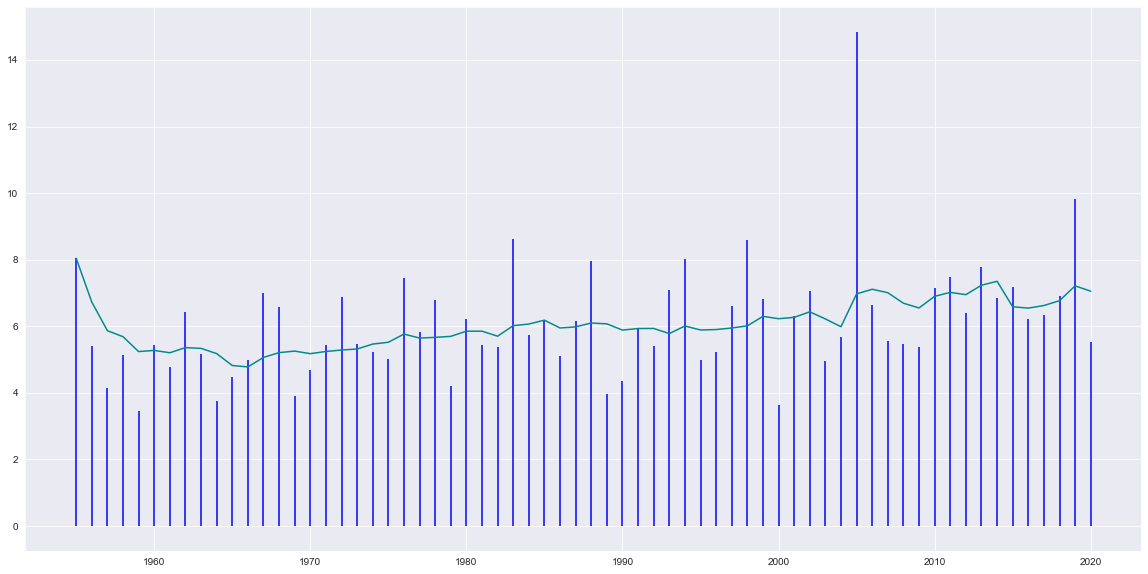

In [107]:
sns.set({'figure.figsize':(20,10)})

# Data

x = prec.index
y= prec['ratio']
l= prec['roll_rain']
 
    
# Create a color if the y axis value is equal or greater than 0
color1="blue"
plt.vlines(x=x, ymin=0, ymax=y, color=color1, alpha=1)

plt.plot(l ,color ='darkcyan', linewidth=1.5)




# Show
        
plt.show()

#### Intepretation of the figure
First , we can see that the average precipitation slowly increases as the years pass. Specifically, since 1998 is steadily above 6mm. It seems that we are getting rain in more concentrated bursts. Also, we can see that after a peak there is some years with the less rain , especially in the period before 2000. The highest extreme values in the ratio has been recorded in 2005
